In [12]:
import boto3
import pandas as pd
import sys
from io import StringIO
from matplotlib import pyplot as plt

In [13]:
# signifying that we're fetching an s3 object
client = boto3.client('s3')

# name of the s3 bucket where the file is
bucket_name = 'scoles-bstn-bucket'

#name of the file / filepath within the s3 bucket
object_key = 'final_ngram.csv'

#creating the csv object that we wish to fetch
csv_obj = client.get_object(Bucket=bucket_name, Key=object_key)

#fetching the contents of the csv file
body = csv_obj['Body']

#decoding body as a csv (utf-8 is the most standard format of CSV files)
csv_string = body.read().decode('utf-8')

#leveraging the StringIO function, which assists in the translation of contents to standard file formats
df = pd.read_csv(StringIO(csv_string))

In [14]:
df.head()

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1


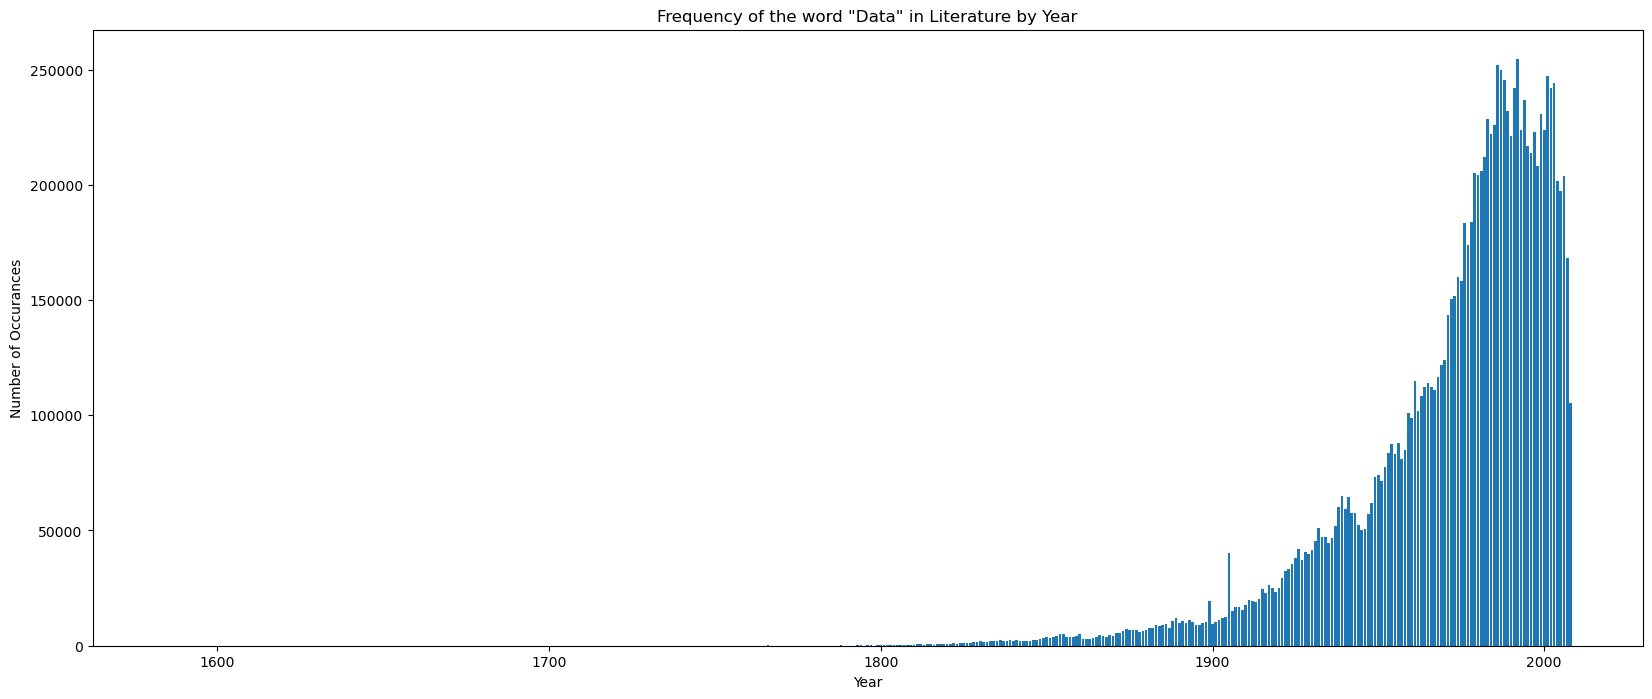

In [21]:
plt.figure(figsize = (20,8))
plt.bar(df['year'], df['frequency'])
plt.xlabel('Year')
plt.ylabel('Number of Occurances')
plt.title('Frequency of the word "Data" in Literature by Year')
plt.show()